In [84]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os, glob, subprocess, random, time
from IPython.display import display, HTML
mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=13) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import networkx as nx
import copy
try:
    print(open('README.md').read())
except:
    pass
print('-'*100)
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        if 'git' in str(root):
            continue
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))
list_files('.')

def prints(txt):
    txt = str(txt)
    try:
        print(txt[:1000])
    except:
        pass
    #print(txt)


# LumPy
[![License: GPL v3](https://img.shields.io/badge/License-GPL%20v3-blue.svg)](http://www.gnu.org/licenses/gpl-3.0)
[![Build Status](https://travis-ci.org/gerritgr/LumPyQest.svg?branch=master)](https://travis-ci.org/gerritgr/LumPyQest)

Copyright: 2018, Gerrit Großmann, [Group of Modeling and Simulation](https://mosi.uni-saarland.de/) at [Saarland University](http://www.cs.uni-saarland.de/)

Version: 0.1 (Please note that this code is an experimental version in a very early development stage.)
## Overview
------------------
The LumPy toolset provides a proof of concept for lumping for AME equations for multistate processes on complex networks.
It reduces the large number of ODEs given by the equation systems by clustering them and only solving a single ODE per cluster.
LumPy is written in Python 3 (requiring SciPy) and published under GPL v3 license.

As input, the tool takes model descriptions (containing degree distribution, rules,
time horizon, etc.) and outputs the lumped (o

In [85]:
clustering_file = 'output/SIS/clustering_SIS_306.csv'
clustering_original_file = 'output/SISfull/clustering_SISfull_1326.csv'
dynamics_original_file = 'output/SISfull/ame_SISfull_1326_trajectories_individual.csv'
dynamics_reduced_file = 'output/SIS/ame_SIS_306_trajectories_individual.csv'  #73

#clustering_file = 'output/SIS/clustering_SIS_73.csv'
#dynamics_reduced_file = 'output/SIS/ame_SIS_73_trajectories_individual.csv'  #73

clustering = pd.read_csv(clustering_file, skiprows=1, sep=';') 
clustering_original = pd.read_csv(clustering_original_file, skiprows=1, sep=';') 
dynamics_original = pd.read_csv(dynamics_original_file, skiprows=1, sep=';')  #open(dynamics_original_file).read()
dynamics_reduced = pd.read_csv(dynamics_reduced_file, skiprows=1, sep=';')  #open(dynamics_reduced_file).read()



In [86]:
clustering_original.head()
len(set(list(clustering['cluster'])))

306

# Funtion m to cluster and vice versa

In [87]:
def get_cluster_maps(clustering):
    try:
        clustering = clustering.to_dict(orient='records')
    except: 
        pass
    
    m_to_cluster = dict()
    cluster_to_m = dict()
    m_to_weight = dict()
    for line in clustering:
        m = eval(line['m'])
        cluster = line['cluster']
        weight = line['weight']
        m_to_cluster[m] = cluster
        m_to_weight[m] = weight
        if cluster not in cluster_to_m:
            cluster_to_m[cluster] = list()
        cluster_to_m[cluster].append(m)
    return m_to_cluster, cluster_to_m, m_to_weight

# Plot Original

### 2652 ODEs and 1326 cluster

In [88]:
print(clustering_original.head())
m_to_cluster, cluster_to_m, m_to_weight = get_cluster_maps(clustering_original)
print(str(cluster_to_m)[:1000])

          m               cluster  weight
0    (7, 3)  (10, (699.0, 300.0))     1.0
1   (31, 6)  (37, (837.0, 162.0))     1.0
2   (5, 31)  (36, (138.0, 861.0))     1.0
3  (20, 25)  (45, (444.0, 555.0))     1.0
4   (3, 35)   (38, (78.0, 921.0))     1.0
{'(10, (699.0, 300.0))': [(7, 3)], '(37, (837.0, 162.0))': [(31, 6)], '(36, (138.0, 861.0))': [(5, 31)], '(45, (444.0, 555.0))': [(20, 25)], '(38, (78.0, 921.0))': [(3, 35)], '(25, (639.0, 360.0))': [(16, 9)], '(34, (176.0, 823.0))': [(6, 28)], '(49, (428.0, 571.0))': [(21, 28)], '(40, (99.0, 900.0))': [(4, 36)], '(23, (826.0, 173.0))': [(19, 4)], '(46, (934.0, 65.0))': [(43, 3)], '(37, (459.0, 540.0))': [(17, 20)], '(32, (218.0, 781.0))': [(7, 25)], '(41, (536.0, 463.0))': [(22, 19)], '(27, (740.0, 259.0))': [(20, 7)], '(48, (916.0, 83.0))': [(44, 4)], '(37, (486.0, 513.0))': [(18, 19)], '(49, (469.0, 530.0))': [(23, 26)], '(27, (777.0, 222.0))': [(21, 6)], '(13, (615.0, 384.0))': [(8, 5)], '(34, (941.0, 58.0))': [(32, 2)], '(45, (288.0,

In [89]:
dynamics_original.head()

,"('I', '(0, (0.0, 999.0))')","('I', '(1, (0.0, 999.0))')","('I', '(1, (999.0, 0.0))')","('I', '(10, (0.0, 999.0))')","('I', '(10, (199.0, 800.0))')","('I', '(10, (299.0, 700.0))')","('I', '(10, (399.0, 600.0))')","('I', '(10, (499.0, 500.0))')","('I', '(10, (599.0, 400.0))')","('I', '(10, (699.0, 300.0))')",...,"('S', '(9, (0.0, 999.0))')","('S', '(9, (111.0, 888.0))')","('S', '(9, (222.0, 777.0))')","('S', '(9, (333.0, 666.0))')","('S', '(9, (444.0, 555.0))')","('S', '(9, (555.0, 444.0))')","('S', '(9, (666.0, 333.0))')","('S', '(9, (777.0, 222.0))')","('S', '(9, (888.0, 111.0))')","('S', '(9, (999.0, 0.0))')"
0,7.464749e-11,0.067183,0.007465,8.230767e-05,0.000046,0.000014,0.000003,3.512597e-07,3.252405e-08,2.065019e-09,...,0.001071,0.001071,0.000476,0.000123,0.000021,0.000002,1.693005e-07,8.061929e-09,2.239425e-10,2.764722e-12
1,7.136282e-11,0.052267,0.030967,1.030474e-05,0.000160,0.000160,0.000100,4.285951e-05,1.274047e-05,2.611262e-06,...,0.000600,0.000889,0.000586,0.000227,0.000057,0.000010,1.097069e-06,8.416672e-08,4.013849e-09,9.346394e-11
2,6.822267e-11,0.041662,0.053330,2.126014e-06,0.000150,0.000227,0.000224,1.565866e-04,7.852179e-05,2.776193e-05,...,0.000340,0.000650,0.000555,0.000280,0.000093,0.000022,3.843804e-06,5.232218e-07,5.188697e-08,2.749108e-09
3,6.522070e-11,0.034487,0.074257,9.199038e-07,0.000120,0.000223,0.000284,2.652625e-04,1.841542e-04,9.230811e-05,...,0.000207,0.000460,0.000459,0.000273,0.000110,0.000033,8.451928e-06,1.857919e-06,3.054601e-07,2.578077e-08
4,6.235083e-11,0.029845,0.093532,5.771082e-07,0.000091,0.000193,0.000287,3.275440e-04,2.859434e-04,1.843058e-04,...,0.000136,0.000328,0.000358,0.000236,0.000108,0.000040,1.383653e-05,4.349116e-06,9.995462e-07,1.144244e-07


In [92]:
os.system('mkdir gif_out')

def plot_dyn(m_to_value, title='Original I Fraction', t=0.3, clusters=100):
    plt.clf()
    import matplotlib.cm as cm
    x_list = list()
    y_list = list()
    value_list = list()
    clusters = len(set(m_to_value.values())) #does not work, need to use clusters
    
    for m, value in m_to_value.items():
        x_list.append(m[0])
        y_list.append(m[1])
        value_list.append(value)
        
        
    #value_list = [np.log(n+0.0000000001) for n in value_list]   #for non diff plot on   
    
    
    ax = plt.gca()
    cmap = cm.Reds # for non dif plots cm.plasma
    ax.scatter(x_list, y_list, c=value_list, alpha=0.9, linewidths=0.0, cmap='Reds', marker=',', s=16)
    ax.set_xlim([-0.5, 55])
    ax.set_ylim([-0.5, 55])
    ax.set_aspect(1.0)
    ax.set(xlabel='Neighbors in state I', ylabel='Neighbors in state S')
    t = str(t)
    t += '000000000'
    t = t[:5]
    plt.title('Probability Mass at t={}, {} clusters'.format(t,clusters))
    plt.savefig('gif_out/'+title.replace(' ','')+'.jpg' , dpi=1000)
    

{(0, 0): 7.464749463148459e-11, (0, 1): 0.06718274516833614, (1, 0): 0.007464749463148461, (0, 10): 8.230767434916922e-05, (2, 8): 4.572648574953849e-05, (3, 7): 1.3548588370233603e-05, (4, 6): 2.634447738656541e-06, (5, 5): 3.5125969848753935e-07, (6, 4): 3.252404615625367e-08, (7, 3): 2.065018803571661e-09, (8, 2): 8.604245014881892e-11, (9, 1): 2.124504941946136e-12, (1, 9): 9.14529714990768e-05, (10, 0): 2.3605610466068345e-14, (0, 11): 5.837153675187414e-05, (2, 9): 3.963499409077874e-05, (3, 8): 1.3211664696926233e-05, (4, 7): 2.9359254882058386e-06, (5, 6): 4.5669952038757497e-07, (6, 5): 5.074439115417505e-08, (7, 4): 4.027332631283742e-09, (8, 3): 2.2374070173798472e-10, (9, 2): 8.286692656962395e-12, (1, 10): 7.134298936340169e-05, (10, 1): 1.841487257102758e-13, (11, 0): 1.86008813848764e-15, (0, 12): 4.226415927827759e-05, (2, 10): 3.443746311563347e-05, (3, 9): 1.2754615968753153e-05, (4, 8): 3.1886539921882874e-06, (5, 7): 5.668718208334756e-07, (6, 6): 7.348338418211695e

{(0, 0): 4.978814792505536e-11, (0, 1): 0.025150360195919333, (1, 0): 0.1648398020747578, (0, 10): 9.977788006726225e-08, (2, 8): 1.916924685987083e-05, (3, 7): 4.977041286994973e-05, (4, 6): 0.00010830028811126658, (5, 5): 0.00021386899793863256, (6, 4): 0.0003645573957992809, (7, 3): 0.0004908431096215705, (8, 2): 0.0004737646010432444, (9, 1): 0.0002868040557190021, (1, 9): 4.483775640878049e-06, (10, 0): 8.117241989433969e-05, (0, 11): 4.2242146290395805e-08, (2, 9): 9.303612874284516e-06, (3, 8): 2.4458134373753283e-05, (4, 7): 5.318312480528961e-05, (5, 6): 0.0001078434611355338, (6, 5): 0.00020035677393238303, (7, 4): 0.00031590585468805455, (8, 3): 0.0003891163434993416, (9, 2): 0.00034274077383880365, (1, 10): 2.0907557938255463e-06, (10, 1): 0.00018976660678686222, (11, 0): 4.93270066847845e-05, (0, 12): 1.8527829517924202e-08, (2, 10): 4.646908016955649e-06, (3, 9): 1.2415317330701123e-05, (4, 8): 2.6839623379373354e-05, (5, 7): 5.452464119420256e-05, (6, 6): 0.0001060170387

{(0, 0): 3.3207540144705253e-11, (0, 1): 0.03069736256497428, (1, 0): 0.22351752590580037, (0, 10): 8.474993834805025e-09, (2, 8): 1.5475434046633629e-06, (3, 7): 3.670427432590849e-06, (4, 6): 1.057684190959021e-05, (5, 5): 3.820235285453157e-05, (6, 4): 0.00013069714056838225, (7, 3): 0.000347255611035374, (8, 2): 0.0006388626096689032, (9, 1): 0.0007157561475910553, (1, 9): 4.7482911339402637e-07, (10, 0): 0.0003666931757186821, (0, 11): 3.0802861672818692e-09, (2, 9): 6.271051507723815e-07, (3, 8): 1.3717658999040783e-06, (4, 7): 3.316022157184238e-06, (5, 6): 1.0974435183230088e-05, (6, 5): 4.0460168528611844e-05, (7, 4): 0.0001288919291927546, (8, 3): 0.0003105476635218416, (9, 2): 0.0005171968909674975, (1, 10): 1.9015918551979036e-07, (10, 1): 0.0005271910652704137, (11, 0): 0.000247311820733182, (0, 12): 1.1624705233258706e-09, (2, 10): 2.6492494340426686e-07, (3, 9): 5.567853772897709e-07, (4, 8): 1.1572785676189507e-06, (5, 7): 3.268006511881938e-06, (6, 6): 1.19650661737130

{(0, 0): 2.214865449791104e-11, (0, 1): 0.032496631523593084, (1, 0): 0.2443040604247498, (0, 10): 1.537071699500054e-09, (2, 8): 2.6031007784053625e-07, (3, 7): 6.781934087792297e-07, (4, 6): 3.0750160050398153e-06, (5, 5): 1.7134330913822598e-05, (6, 4): 7.927457973071939e-05, (7, 3): 0.00026599378818156365, (8, 2): 0.0005993880766617727, (9, 1): 0.0008100108268949672, (1, 9): 9.526706137629658e-08, (10, 0): 0.0004961361583996941, (0, 11): 4.980785896072939e-10, (2, 9): 9.092557322896717e-08, (3, 8): 1.9420380795540591e-07, (4, 7): 6.827141411387373e-07, (5, 6): 3.7702351605631613e-06, (6, 5): 1.998697966578013e-05, (7, 4): 8.251560744058354e-05, (8, 3): 0.0002461922634745608, (9, 2): 0.0004972201241342425, (1, 10): 3.394515123913964e-08, (10, 1): 0.0006077942731623661, (11, 0): 0.0003395926002199137, (0, 12): 1.6786506971922786e-10, (2, 10): 3.3628589076550855e-08, (3, 9): 6.3689824962211e-08, (4, 8): 1.6797449408947578e-07, (5, 7): 8.242402233702039e-07, (6, 6): 4.724948789868791e-

{(0, 0): 1.4772631238337445e-11, (0, 1): 0.03302420190890535, (1, 0): 0.2523187733292364, (0, 10): 4.2600050569071386e-10, (2, 8): 7.917848231708114e-08, (3, 7): 3.1354213280884123e-07, (4, 6): 2.1193793261468244e-06, (5, 5): 1.3866060801461738e-05, (6, 4): 6.933845025026999e-05, (7, 3): 0.0002462919090827773, (8, 2): 0.0005838675761286686, (9, 1): 0.0008280461730983256, (1, 9): 2.7389100479693115e-08, (10, 0): 0.0005315991643255512, (0, 11): 1.2230194374132379e-10, (2, 9): 2.3006537742512407e-08, (3, 8): 6.850054496104591e-08, (4, 7): 4.05625119796062e-07, (5, 6): 2.8581638027474064e-06, (6, 5): 1.6694956215579583e-05, (7, 4): 7.323457545369073e-05, (8, 3): 0.0002299784963816512, (9, 2): 0.0004873202276227825, (1, 10): 8.63283450049107e-09, (10, 1): 0.0006241209174371747, (11, 0): 0.0003650768839548596, (0, 12): 3.672486756291997e-11, (2, 10): 7.277024442284833e-09, (3, 9): 1.7124824459529277e-08, (4, 8): 8.067850990226304e-08, (5, 7): 5.739562144821798e-07, (6, 6): 3.760079869588588e

{(0, 0): 9.419441910373985e-12, (0, 1): 0.03339836613702446, (1, 0): 0.2566074842259365, (0, 10): 1.3588283672375438e-10, (2, 8): 3.563448243759238e-08, (3, 7): 2.3248844696709128e-07, (4, 6): 1.9051397054838044e-06, (5, 5): 1.3081583661325885e-05, (6, 4): 6.679043569966437e-05, (7, 3): 0.00024092412747556144, (8, 2): 0.0005792070163090817, (9, 1): 0.0008326344952656754, (1, 9): 8.878968181907118e-09, (10, 0): 0.0005417128013179616, (0, 11): 3.3324659525543123e-11, (2, 9): 8.18756779471662e-09, (3, 8): 4.309492019819719e-08, (4, 7): 3.4882970644044334e-07, (5, 6): 2.65231672075393e-06, (6, 5): 1.5885589427820027e-05, (7, 4): 7.08046633250208e-05, (8, 3): 0.0002254765873408307, (9, 2): 0.0004842256660663536, (1, 10): 2.3867807957911828e-09, (10, 1): 0.0006283820397145213, (11, 0): 0.00037240179198490015, (0, 12): 8.641953900284195e-12, (2, 10): 2.0795338735264995e-09, (3, 9): 8.630060903516232e-09, (4, 8): 6.459855114088755e-08, (5, 7): 5.216869791388519e-07, (6, 6): 3.5331920730374023e

{(0, 0): 6.282545115800246e-12, (0, 1): 0.03369790316650455, (1, 0): 0.2591759406984882, (0, 10): 6.12517809248544e-11, (2, 8): 2.481232069472927e-08, (3, 7): 2.1338330981500608e-07, (4, 6): 1.8576938176963425e-06, (5, 5): 1.2913527284886628e-05, (6, 4): 6.624773216643145e-05, (7, 3): 0.00023977657320356656, (8, 2): 0.0005782034551422646, (9, 1): 0.0008336263330058389, (1, 9): 4.045982597551028e-09, (10, 0): 0.0005439189014776865, (0, 11): 1.2819129982650338e-11, (2, 9): 4.871687400757475e-09, (3, 8): 3.759129637691632e-08, (4, 7): 3.368102190455076e-07, (5, 6): 2.6090639795981463e-06, (6, 5): 1.5714795577542477e-05, (7, 4): 7.028790372166913e-05, (8, 3): 0.00022450971827170377, (9, 2): 0.000483547848628625, (1, 10): 9.273655221833518e-10, (10, 1): 0.0006292908043792803, (11, 0): 0.0003739938777750611, (0, 12): 2.856046274321296e-12, (2, 10): 1.0376160567865326e-09, (3, 9): 6.964949732863013e-09, (4, 8): 6.142076941206553e-08, (5, 7): 5.110126532777665e-07, (6, 6): 3.4858190374732492e-

{(0, 0): 4.190309763919545e-12, (0, 1): 0.03398021771526307, (1, 0): 0.26128990264786334, (0, 10): 3.639378130727324e-11, (2, 8): 2.1251314072818665e-08, (3, 7): 2.075221115785997e-07, (4, 6): 1.846044467036531e-06, (5, 5): 1.2881725753683956e-05, (6, 4): 6.615981754400053e-05, (7, 3): 0.00023960715985991906, (8, 2): 0.0005780750699776789, (9, 1): 0.0008338048688978397, (1, 9): 2.429671786923315e-09, (10, 0): 0.0005442608271276211, (0, 11): 6.681660679631778e-12, (2, 9): 3.8846157283191425e-09, (3, 8): 3.600941018612698e-08, (4, 7): 3.338620102925999e-07, (5, 6): 2.600806782159986e-06, (6, 5): 1.568702445802673e-05, (7, 4): 7.021026269419925e-05, (8, 3): 0.0002243714352882546, (9, 2): 0.0004834591891448871, (1, 10): 4.890043222559798e-10, (10, 1): 0.0006294328877476547, (11, 0): 0.00037422689125996705, (0, 12): 1.3015108721069028e-12, (2, 10): 7.581968422353766e-10, (3, 9): 6.523956722659146e-09, (4, 8): 6.065286350005609e-08, (5, 7): 5.089357921367444e-07, (6, 6): 3.4780342191007996e-

{(0, 0): 2.794837935480616e-12, (0, 1): 0.03424751983232678, (1, 0): 0.26316078745189214, (0, 10): 2.7975839690250076e-11, (2, 8): 2.006773159437288e-08, (3, 7): 2.059829804524672e-07, (4, 6): 1.8462867050855664e-06, (5, 5): 1.2896105944941259e-05, (6, 4): 6.622778384067275e-05, (7, 3): 0.00023977543970854736, (8, 2): 0.0005782518074160007, (9, 1): 0.0008337056909332301, (1, 9): 1.881131010030937e-09, (10, 0): 0.0005439577432711483, (0, 11): 4.8161734976432676e-12, (2, 9): 3.586175730733898e-09, (3, 8): 3.559677344143463e-08, (4, 7): 3.3376590760635444e-07, (5, 6): 2.6041874562722036e-06, (6, 5): 1.5707991668782437e-05, (7, 4): 7.028382536786214e-05, (8, 3): 0.0002245204310760822, (9, 2): 0.00048357732023438367, (1, 10): 3.555332250363287e-10, (10, 1): 0.00062931213391518, (11, 0): 0.00037398865621724814, (0, 12): 8.778468913994848e-13, (2, 10): 6.817627930480861e-10, (3, 9): 6.412792008972012e-09, (4, 8): 6.058652289562229e-08, (5, 7): 5.096367299930093e-07, (6, 6): 3.4836398292842574

{(0, 0): 1.8640911445214417e-12, (0, 1): 0.03449974711842351, (1, 0): 0.26485903663772603, (0, 10): 2.512429963322185e-11, (2, 8): 1.96942302395433e-08, (3, 7): 2.059615420131561e-07, (4, 6): 1.850977371933775e-06, (5, 5): 1.2928460408874866e-05, (6, 4): 6.635722251175986e-05, (7, 3): 0.00024007750085984657, (8, 2): 0.0005785500567187446, (9, 1): 0.0008334980360431925, (1, 9): 1.694412353131114e-09, (10, 0): 0.0005434007842055028, (0, 11): 4.24701314680628e-12, (2, 9): 3.4984233591184518e-09, (3, 8): 3.5556454282711656e-08, (4, 7): 3.346798847162544e-07, (5, 6): 2.612033171218523e-06, (6, 5): 1.5748136909676025e-05, (7, 4): 7.041728278429061e-05, (8, 3): 0.00022478345264396532, (9, 2): 0.0004837777855033462, (1, 10): 3.146315419745797e-10, (10, 1): 0.000629087867658579, (11, 0): 0.0003735643884640848, (0, 12): 7.61566538069354e-13, (2, 10): 6.610003433459102e-10, (3, 9): 6.396044039336033e-09, (4, 8): 6.075111243877365e-08, (5, 7): 5.113819465648013e-07, (6, 6): 3.4945023848156126e-06,

{(0, 0): 1.243304863831833e-12, (0, 1): 0.03473649174396246, (1, 0): 0.2664131891937822, (0, 10): 2.4164218410066545e-11, (2, 8): 1.9600641107088208e-08, (3, 7): 2.0649454372963705e-07, (4, 6): 1.8574376220160804e-06, (5, 5): 1.2968245735820598e-05, (6, 4): 6.651224290084034e-05, (7, 3): 0.00024043511222168623, (8, 2): 0.0005788984990403463, (9, 1): 0.0008332455708246514, (1, 9): 1.630574591579978e-09, (10, 0): 0.0005427396847402362, (0, 11): 4.072035099338821e-12, (2, 9): 3.476003200672978e-09, (3, 8): 3.564022321964388e-08, (4, 7): 3.3598037008961205e-07, (5, 6): 2.6217176202195024e-06, (6, 5): 1.5796293758357086e-05, (7, 4): 7.057572875829932e-05, (8, 3): 0.00022509379894402758, (9, 2): 0.0004840120716702585, (1, 10): 3.018603661866337e-10, (10, 1): 0.0006288205882713717, (11, 0): 0.0003730636419473561, (0, 12): 7.289136992565891e-13, (2, 10): 6.55713615744124e-10, (3, 9): 6.4077844398676034e-09, (4, 8): 6.09997384434526e-08, (5, 7): 5.135548847997577e-07, (6, 6): 3.5075716298282762

{(0, 0): 8.294241766172491e-13, (0, 1): 0.034957449389277896, (1, 0): 0.2678380201375293, (0, 10): 2.3847365578206726e-11, (2, 8): 1.9604484653666906e-08, (3, 7): 2.0722879840130348e-07, (4, 6): 1.8645507967124503e-06, (5, 5): 1.3010708767474706e-05, (6, 4): 6.667621421379713e-05, (7, 3): 0.0002408115994349165, (8, 2): 0.0005792632056271129, (9, 1): 0.000832977213708284, (1, 9): 1.608510018729177e-09, (10, 0): 0.0005420439866974983, (0, 11): 4.01719906981052e-12, (2, 9): 3.4741535277883956e-09, (3, 8): 3.576622556007742e-08, (4, 7): 3.3742239627717133e-07, (5, 6): 2.6320736276027384e-06, (6, 5): 1.584730065000359e-05, (7, 4): 7.074283144222772e-05, (8, 3): 0.000225420090910515, (9, 2): 0.0004842571486784594, (1, 10): 2.976601421462333e-10, (10, 1): 0.0006285383611338526, (11, 0): 0.00037253765495461456, (0, 12): 7.191134508656373e-13, (2, 10): 6.548344934781508e-10, (3, 9): 6.428586225499205e-09, (4, 8): 6.127893213266824e-08, (5, 7): 5.158868443779739e-07, (6, 6): 3.521440888023483e-0

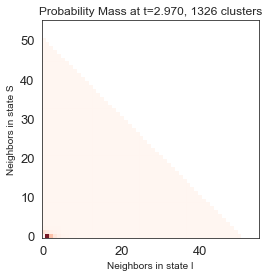

In [91]:
m_to_value_t = dict()
for timepoint in list(range(101)):
    dynamics_original   #101 rows × 2652 columns
    dyn_o =  dynamics_original.to_dict(orient='records')
    dyn_line = dyn_o[timepoint]
    m_to_value = dict()
    for cluster, value in dyn_line.items():
        if 'S' in cluster:
            continue
        cluster = cluster.replace("('I', '", "").replace("')","")
        mlist = cluster_to_m[cluster]
        for m in mlist:   # do weights
            m_to_value[m] = value
    prints(m_to_value) 
    m_to_value_t[timepoint] = copy.copy(m_to_value)

    real_time = str(timepoint/101.0*3) + '00000000000000000000'
    real_time = real_time[:6]
    plot_dyn(m_to_value, 'Original Inf   t='+real_time, timepoint/101.0*3)

# Plot Reduced 

In [ ]:
m_to_cluster, cluster_to_m, m_to_weight = get_cluster_maps(clustering)
prints(cluster_to_m)

for timepoint in list(range(101)):
    m_to_value_baseline = m_to_value_t[timepoint]
    dynamics_reduced   #101 rows × 2652 columns
    dyn_o =  dynamics_reduced.to_dict(orient='records')
    dyn_line = dyn_o[timepoint]
    m_to_value = dict()
    for cluster, value in dyn_line.items():
        if 'S' in cluster:
            continue
        cluster = cluster.replace("('I', '", "").replace("')","")
        mlist = cluster_to_m[cluster]
        for m in mlist:  
            m_to_value[m] = value * m_to_weight[m]  #ORIGINAL
            #m_to_value[m] = np.abs(m_to_value_baseline[m] - m_to_value[m])  # For Diff plot
            #m_to_value[m] = np.abs(m_to_value_baseline[m] - m_to_value[m])/(m_to_value_baseline[m]+m_to_value[m])  # For Diff plot relativ error
            #m_to_value[m] = np.log(np.abs(m_to_value_baseline[m] - m_to_value[m])+0.00000000000001)
            m_to_value[m] = np.abs(np.log(m_to_value[m]+0.0000000001) - np.log(m_to_value_baseline[m]+0.0000000001))
    prints(m_to_value) 

    real_time = str(timepoint/101.0*3) + '00000000000000000000'
    real_time = real_time[:6]
    plot_dyn(m_to_value, 'DIFFReduced 306 Inf   t='+real_time, timepoint/101.0*3)

{'(9, (15.0, 6.0))': [(7, 3)], '(20, (18.0, 3.0))': [(31, 6), (30, 5), (34, 6), (36, 6), (31, 5), (32, 6), (33, 7), (35, 7), (30, 6), (34, 7), (32, 7), (33, 6), (29, 6), (35, 6)], '(20, (3.0, 18.0))': [(5, 31), (6, 32), (7, 34), (6, 36), (7, 33), (6, 31), (6, 35), (7, 35), (5, 30), (6, 29), (6, 33), (6, 30), (6, 34), (7, 32)], '(21, (9.0, 12.0))': [(20, 25), (21, 28), (19, 27), (20, 28), (20, 27), (21, 26), (22, 28), (22, 27), (20, 24), (21, 29), (19, 24), (18, 25), (20, 26), (21, 27), (19, 26), (19, 25)], '(20, (1.0, 20.0))': [(3, 35), (2, 38), (2, 33), (3, 37), (2, 36), (3, 39), (2, 34), (3, 32), (3, 34), (2, 39), (3, 36), (2, 37), (3, 33), (3, 38), (2, 40), (2, 35)], '(17, (14.0, 7.0))': [(16, 9), (17, 8), (16, 8), (17, 9), (15, 8)], '(19, (3.0, 18.0))': [(6, 28), (6, 27), (5, 29), (5, 27), (5, 28), (5, 26)], '(20, (2.0, 19.0))': [(4, 36), (4, 35), (5, 34), (4, 38), (5, 32), (4, 32), (5, 37), (4, 34), (5, 35), (4, 31), (4, 37), (5, 33), (4, 33), (5, 36)], '(17, (18.0, 3.0))': [(19, 

{(0, 0): 0.017028804928621355, (0, 1): 0.001752452342254518, (1, 0): 0.031025789594531172, (0, 2): 0.013750326994478534, (1, 1): 0.011734438005329029, (2, 0): 0.04295372016213017, (0, 11): 0.23016743619890434, (1, 10): 0.2172218857858894, (6, 5): 0.027569751063071024, (7, 4): 0.001581029537385703, (8, 3): 0.025403634899851646, (9, 2): 0.053274119917933405, (10, 1): 0.08184887792618589, (11, 0): 0.1109826078355649, (2, 9): 0.16212789949340944, (3, 8): 0.11600302407918406, (4, 7): 0.08086723150920783, (5, 6): 0.053110727508462574, (0, 12): 0.2565145809333309, (1, 11): 0.24432762378250494, (6, 6): 0.04727985218237585, (7, 5): 0.021763738261649124, (8, 4): 0.004739589097846775, (9, 3): 0.03221128237426285, (10, 2): 0.06045947660710205, (11, 1): 0.08932078930604703, (12, 0): 0.11867343680047071, (2, 10): 0.18781100022203034, (3, 9): 0.13937404305156775, (4, 8): 0.10180723423628457, (5, 7): 0.07280860608071826, (0, 14): 0.024268029891111098, (0, 13): 0.5104219699483217, (1, 13): 0.0531450219

{(0, 0): 0.18404846137233832, (0, 1): 0.022953396629523226, (1, 0): 0.03423673034200947, (0, 2): 0.001775930329683817, (1, 1): 0.013097167204797255, (2, 0): 0.03457292565559289, (0, 11): 0.30686706913927964, (1, 10): 0.3066241337258262, (6, 5): 0.07547988167868169, (7, 4): 0.04474600174209087, (8, 3): 0.020091073022612704, (9, 2): 0.001624022843583539, (10, 1): 0.02178823240311978, (11, 0): 0.041040695214732636, (2, 9): 0.2636044152059682, (3, 8): 0.22259105004496504, (4, 7): 0.172765009119896, (5, 6): 0.11798706619167376, (0, 12): 0.324578294849843, (1, 11): 0.3407770068617495, (6, 6): 0.10492781964356723, (7, 5): 0.06787442903493357, (8, 4): 0.04017998114842136, (9, 3): 0.016950360759443228, (10, 2): 0.004064790361150372, (11, 1): 0.02385679393897444, (12, 0): 0.04289849777680921, (2, 10): 0.2978519511642279, (3, 9): 0.259196718744926, (4, 8): 0.21497491847167183, (5, 7): 0.1571840805274345, (0, 14): 0.026473589852169965, (0, 13): 0.5554390161602214, (1, 13): 0.06978991683907054, (1,

{(0, 0): 0.30149552102870913, (0, 1): 0.02600563642158571, (1, 0): 0.0318569835523439, (0, 2): 0.006491917538478553, (1, 1): 0.013296669730576749, (2, 0): 0.026840761132751467, (0, 11): 0.30381069564131735, (1, 10): 0.3592813032614579, (6, 5): 0.03852636682279531, (7, 4): 0.024322655792895276, (8, 3): 0.01331236967752325, (9, 2): 0.00336723221008306, (10, 1): 0.006124879760663227, (11, 0): 0.015380322847964756, (2, 9): 0.3175965203257647, (3, 8): 0.24533832982421622, (4, 7): 0.13146789147114468, (5, 6): 0.06455005375030254, (0, 12): 0.25274947443374174, (1, 11): 0.39743962620026707, (6, 6): 0.05111184087057019, (7, 5): 0.033710065479928275, (8, 4): 0.021930463707731107, (9, 3): 0.011786426261375382, (10, 2): 0.0022486142744346793, (11, 1): 0.007005814340035776, (12, 0): 0.016100810665298226, (2, 10): 0.36093942758708053, (3, 9): 0.30563938925709877, (4, 8): 0.19108724311178626, (5, 7): 0.09066840192531167, (0, 14): 0.007280858158985382, (0, 13): 0.26079408831934714, (1, 13): 0.06901854

{(0, 0): 0.37348886633806444, (0, 1): 0.02643572558048346, (1, 0): 0.030321254353177007, (0, 2): 0.009141739841830088, (1, 1): 0.01352346139216598, (2, 0): 0.022553084521748534, (0, 11): 0.2193486756225198, (1, 10): 0.40216259811708355, (6, 5): 0.020562158619393145, (7, 4): 0.013803807226112852, (8, 3): 0.008011011563585413, (9, 2): 0.002513119551736054, (10, 1): 0.002866342045570569, (11, 0): 0.008186376408464646, (2, 9): 0.33132801476298823, (3, 8): 0.17959767195000254, (4, 7): 0.06442607386091659, (5, 6): 0.03152171607150933, (0, 12): 0.11726711719397898, (1, 11): 0.43962349810222534, (6, 6): 0.02622029874262566, (7, 5): 0.01868709646938882, (8, 4): 0.012747310431295844, (9, 3): 0.007228046346760664, (10, 2): 0.0018563344797817294, (11, 1): 0.003448731764154722, (12, 0): 0.008717198764811585, (2, 10): 0.3900810473099128, (3, 9): 0.2566419374262061, (4, 8): 0.09763001424796514, (5, 7): 0.041563770223023155, (0, 14): 0.0015261269125304011, (0, 13): 0.07389360901230191, (1, 13): 0.0592

{(0, 0): 0.4233807447990543, (0, 1): 0.026553412998521875, (1, 0): 0.029591183364365836, (0, 2): 0.009827637299242298, (1, 1): 0.013067440320489787, (2, 0): 0.019984397699296608, (0, 11): 0.11111244404492027, (1, 10): 0.41457777623140757, (6, 5): 0.014435690385024458, (7, 4): 0.009970322438528356, (8, 3): 0.005895591139188028, (9, 2): 0.001950801133809854, (10, 1): 0.001937745418384651, (11, 0): 0.005796650920887991, (2, 9): 0.27802058226315296, (3, 8): 0.09925975002368048, (4, 7): 0.03529466678746296, (5, 6): 0.020502985094058346, (0, 12): 0.04082701683229217, (1, 11): 0.4316412091983004, (6, 6): 0.01819350633306449, (7, 5): 0.013462170397220419, (8, 4): 0.009321537265153168, (9, 3): 0.005357151664982851, (10, 2): 0.0014626913234980776, (11, 1): 0.0023971941811131714, (12, 0): 0.006237073797624504, (2, 10): 0.3459674756280897, (3, 9): 0.14913346128658134, (4, 8): 0.048717400365713814, (5, 7): 0.02563072831714841, (0, 14): 0.00016265502338441706, (0, 13): 0.019711007413601322, (1, 13):

{(0, 0): 0.45870625319119895, (0, 1): 0.02657756252410781, (1, 0): 0.02923552721884315, (0, 2): 0.009494291071200145, (1, 1): 0.012240225164956708, (2, 0): 0.018182435531516994, (0, 11): 0.04516699459792761, (1, 10): 0.3545022415762986, (6, 5): 0.01206201629531023, (7, 4): 0.008423356708261664, (8, 3): 0.0050105080388078704, (9, 2): 0.0016847084525108968, (10, 1): 0.0015995492437648196, (11, 0): 0.004860688032063187, (2, 9): 0.17628074155109275, (3, 8): 0.05440662521506212, (4, 7): 0.024590790150348596, (5, 6): 0.016478437380733624, (0, 12): 0.013087700139717384, (1, 11): 0.32183694193407675, (6, 6): 0.01517391439639404, (7, 5): 0.01137939853335368, (8, 4): 0.007910934026220673, (9, 3): 0.0045608676891149, (10, 2): 0.0012644781731774302, (11, 1): 0.002003308005177118, (12, 0): 0.005253940380969269, (2, 10): 0.22187332306978647, (3, 9): 0.07571429394027263, (4, 8): 0.03115010035222099, (5, 7): 0.02016779474745789, (0, 14): 0.00020782657301054996, (0, 13): 0.005544131424606746, (1, 13): 

{(0, 0): 0.4838162215058901, (0, 1): 0.02655665913424654, (1, 0): 0.029026783358255592, (0, 2): 0.008806619447315533, (1, 1): 0.011334671356175274, (2, 0): 0.016760564936516342, (0, 11): 0.017445802885973194, (1, 10): 0.22952158699879277, (6, 5): 0.011022110166859278, (7, 4): 0.0077240362795922834, (8, 3): 0.0046011785147950235, (9, 2): 0.0015533089152395263, (10, 1): 0.0014567529643620958, (11, 0): 0.004445219164759706, (2, 9): 0.09716219627560108, (3, 8): 0.035888797428420105, (4, 7): 0.020566924350093885, (5, 6): 0.014828063068929254, (0, 12): 0.0042901727616531105, (1, 11): 0.16790988728701706, (6, 6): 0.013878763846802755, (7, 5): 0.010445015850681472, (8, 4): 0.0072649597707989955, (9, 3): 0.004189385821019798, (10, 2): 0.001164312353665764, (11, 1): 0.0018330537337378772, (12, 0): 0.004813616554054434, (2, 10): 0.11431867268378326, (3, 9): 0.04555478168524374, (4, 8): 0.0251266296428021, (5, 7): 0.018067032776601266, (0, 14): 0.00031088529638623186, (0, 13): 0.001849391072695994